# 日経平均株価

In [32]:
import datetime as dt
import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import mplfinance as mpf
import yfinance as yf

In [33]:
class Target:
    symbol = None
    name = None

In [34]:
target = Target()
target.symbol = '^N225'
target.name = '日経平均株価'
ticker = yf.Ticker(target.symbol)

## 過去６ヶ月の日足データ

In [35]:
df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-09 00:00:00+09:00,36915.441406,37287.261719,36807.031250,36897.421875,146800000,0.0,0.0
2024-02-13 00:00:00+09:00,37248.359375,38010.691406,37184.101562,37963.968750,140500000,0.0,0.0
2024-02-14 00:00:00+09:00,37712.871094,37825.851562,37594.468750,37703.320312,120300000,0.0,0.0
2024-02-15 00:00:00+09:00,38017.828125,38188.738281,37935.359375,38157.941406,130000000,0.0,0.0
2024-02-16 00:00:00+09:00,38517.371094,38865.058594,38361.550781,38487.238281,151700000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00+09:00,35249.359375,35301.179688,31156.119141,31458.419922,285600000,0.0,0.0
2024-08-06 00:00:00+09:00,32077.330078,34911.800781,32077.330078,34675.460938,251200000,0.0,0.0
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0


### ローソク足チャートと出来高、モメンタム

Reference: https://mekatana.com/python-momentum/

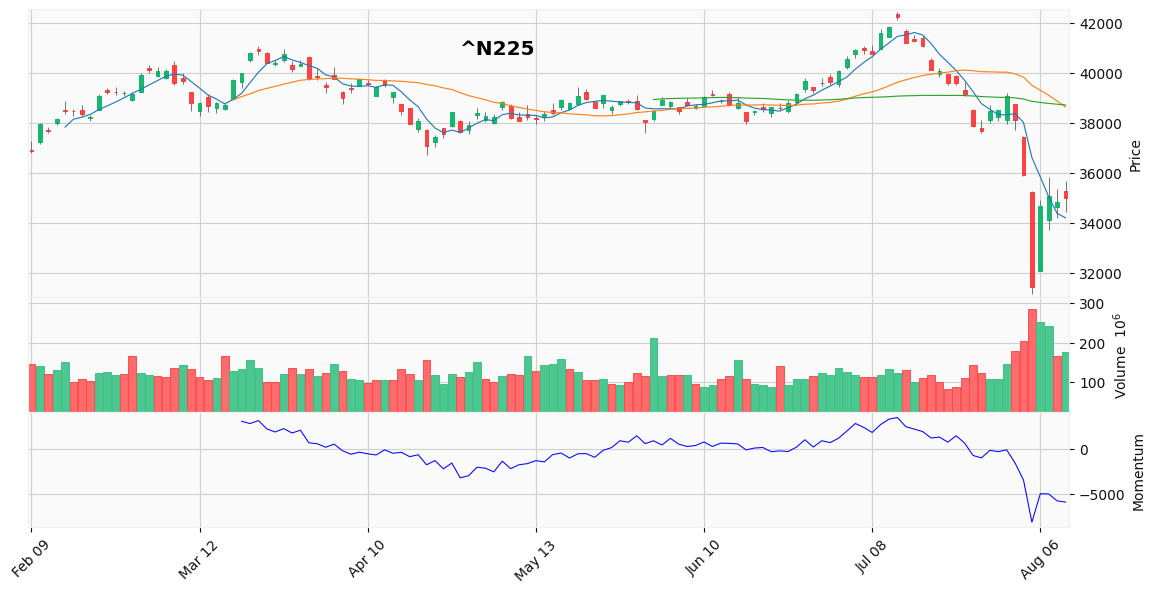

In [65]:
# モメンタム
period = 25
df['momentum'] = df['Close'] - df['Close'].shift(period)

apd_roscillator = [
    mpf.make_addplot(df['momentum'], panel=2, ylabel='Momentum', color='b', width=0.75)
]

# チャート描写
mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    addplot=apd_roscillator,
    title=target.symbol,
    figsize=(12, 6),
    tight_layout=True,
    #savefig=dict(fname='report_20240810_n225_1.jpeg', dpi=100)
)


### ローソク足チャートとボリンジャーバンド

Reference: https://mekatana.com/bollinger-bands-python/

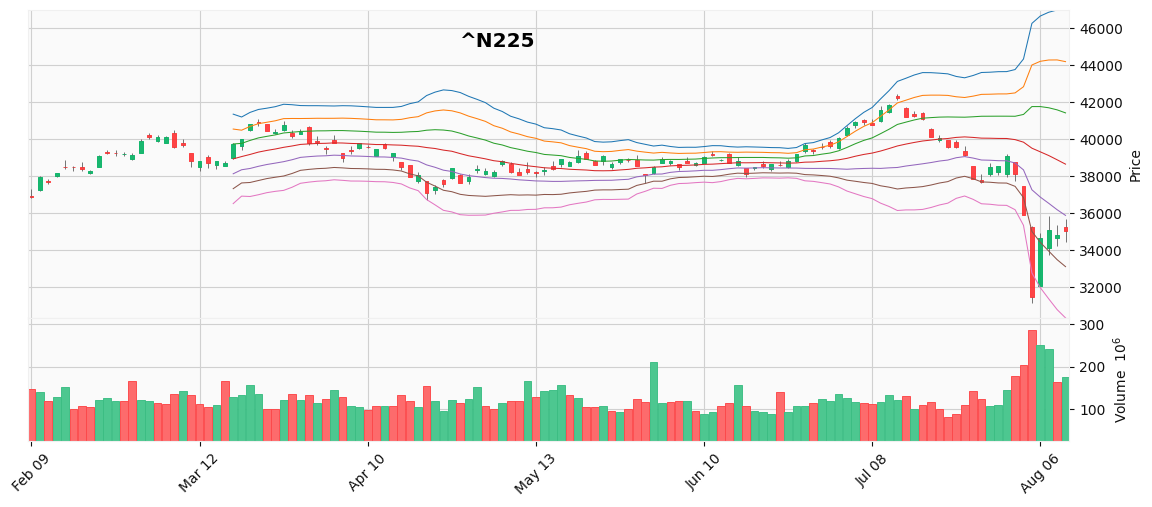

In [67]:
period = 25
r = df['Close'].rolling(period)    
df['upper3'] = r.mean() + 3 * r.std()
df['upper2'] = r.mean() + 2 * r.std()
df['upper1'] = r.mean() + 1 * r.std()
df['mean'] = r.mean()
df['lower1'] = r.mean() - 1 * r.std()
df['lower2'] = r.mean() - 2 * r.std()
df['lower3'] = r.mean() - 3 * r.std()

df_upper3_max=df['upper3'].max() + 10
df_lower3_min=df['lower3'].min() - 10 

apd_oscilator  = [
    mpf.make_addplot(df[['upper3', 'upper2', 'upper1','mean', 'lower1', 'lower2', 'lower3']], width=0.75)
]   

mpf.plot(
    df, type='candle', style='yahoo',
    volume=True,
    title=target.symbol,
    addplot=apd_oscilator,
    ylim=(df_lower3_min, df_upper3_max),
    figsize=(12, 5),
    tight_layout=True,
    #savefig=dict(fname='report_20240810_n225_2.jpeg', dpi=100)
)


## 過去10年の月足データ

In [57]:
df_long = ticker.history(period='10y', interval='1mo')
df_long

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-01 00:00:00+09:00,15454.589844,16374.139648,15440.990234,16173.519531,2530100000,0.0,0.0
2014-10-01 00:00:00+09:00,16173.389648,16533.910156,14529.030273,16413.759766,3436700000,0.0,0.0
2014-11-01 00:00:00+09:00,16732.849609,17520.539062,16713.369141,17459.849609,3155400000,0.0,0.0
2014-12-01 00:00:00+09:00,17475.099609,18030.830078,16672.939453,17450.769531,2962900000,0.0,0.0
2015-01-01 00:00:00+09:00,17325.679688,17850.589844,16592.570312,17674.390625,2691500000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00+09:00,40646.699219,40697.218750,36733.058594,38405.660156,2522300000,0.0,0.0
2024-05-01 00:00:00+09:00,38107.378906,39437.160156,37617.000000,38487.898438,2632400000,0.0,0.0
2024-06-01 00:00:00+09:00,38734.949219,39788.628906,37950.199219,39583.078125,2209000000,0.0,0.0


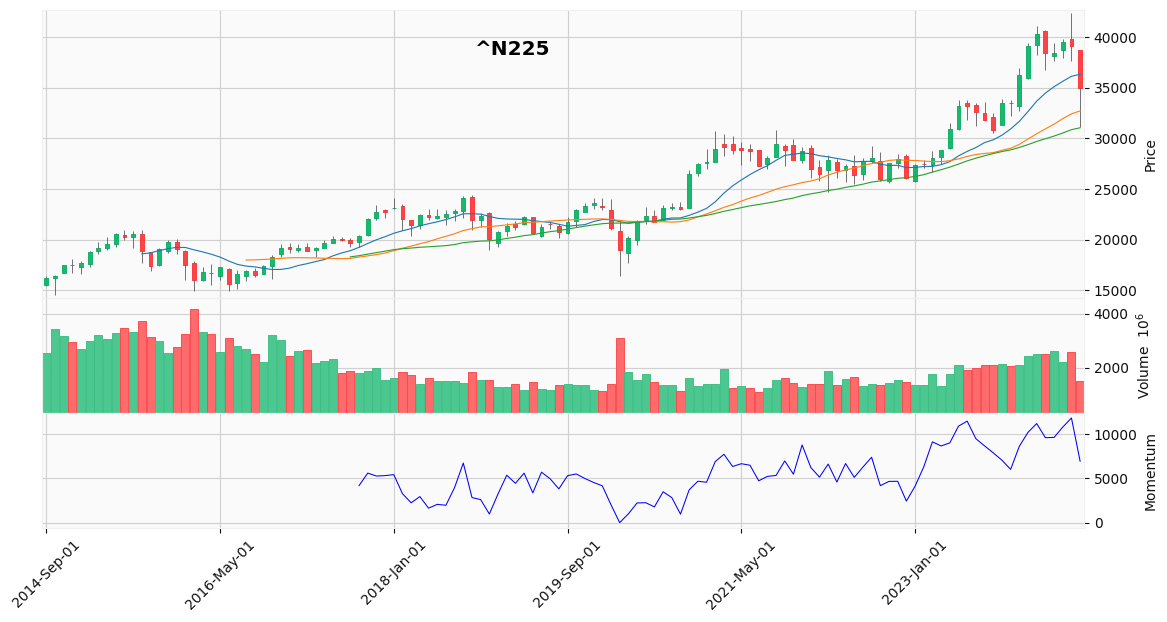

In [72]:
# モメンタム
period = 36
df_long['momentum'] = df_long['Close'] - df_long['Close'].shift(period)

apd_roscillator = [
    mpf.make_addplot(df_long['momentum'], panel=2, ylabel='Momentum', color='b', width=0.75)
]

# チャート描写
mpf.plot(
    df_long, type='candle', style='yahoo', mav=(12, 24, 36),
    volume=True,
    addplot=apd_roscillator,
    title=target.symbol,
    figsize=(12, 6),
    tight_layout=True,
    #savefig=dict(fname='report_20240810_n225_3.jpeg', dpi=100)
)